In [5]:
import pandas as pd
from utils.data_types import *
from utils.data_helper import *
from utils.constraints import *
from utils.entities_choice import *

machines: list[Machine] = get_data_from_excel("machines")
work_types: list[WorkType] = get_data_from_excel("work types")
supplier_orders: list[SupplierOrder] = get_data_from_excel("supplier order")
customer_deadlines: list[CustomerDeadline] = get_data_from_excel("customer order")

In [80]:
solution = Solution(
    machines,
    work_types,
    supplier_orders,
    customer_deadlines,
)

solution.constructive_solution()

works to do: 5
 works to do: [{'id': 'W0', 'quantity_to_work': 50, 'time_machine_needed': 40}, {'id': 'W1', 'quantity_to_work': 95, 'time_machine_needed': 40}, {'id': 'W2', 'quantity_to_work': 40, 'time_machine_needed': 10}, {'id': 'W3', 'quantity_to_work': 55, 'time_machine_needed': 30}, {'id': 'W4', 'quantity_to_work': 70, 'time_machine_needed': 40}]
works to do: 5
 works to do: [{'id': 'W0', 'quantity_to_work': 50, 'time_machine_needed': 40}, {'id': 'W1', 'quantity_to_work': 58, 'time_machine_needed': 40}, {'id': 'W2', 'quantity_to_work': 40, 'time_machine_needed': 10}, {'id': 'W3', 'quantity_to_work': 18, 'time_machine_needed': 30}, {'id': 'W4', 'quantity_to_work': 33, 'time_machine_needed': 40}]
works to do: 5
 works to do: [{'id': 'W0', 'quantity_to_work': 4, 'time_machine_needed': 40}, {'id': 'W1', 'quantity_to_work': 12, 'time_machine_needed': 40}, {'id': 'W2', 'quantity_to_work': 40, 'time_machine_needed': 10}, {'id': 'W3', 'quantity_to_work': 18, 'time_machine_needed': 30}, {

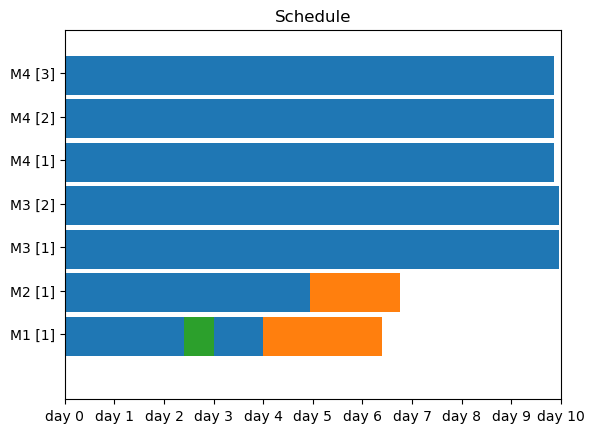

In [79]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

total_slots = sum(
    [schedule_machine.machine["pallets"] for schedule_machine in solution.schedule]
)
height_bar = 9
rects_y = np.arange(10, 10 * (total_slots + 1), 10)


# Create a new figure and axis
fig, ax = plt.subplots()
ax.set_title(f"Schedule")

index_slot = 0
height_padding_machine = 0
for i_schedule, schedule_machine in enumerate(solution.schedule):
    for i_pallet in range(schedule_machine.machine["pallets"]):
        for i_job, job in enumerate(schedule_machine.list_jobs):
            start_time = (
                0
                if i_job == 0
                else schedule_machine.list_jobs[i_job - 1].time_machine_needed()
            )
            size = job.time_machine_needed()
            ax.broken_barh(
                [
                    (start_time, size),
                ],
                (rects_y[index_slot], height_bar),
                facecolor=(list(mcolors.TABLEAU_COLORS.keys())[i_job]),
            )
        index_slot += 1
    height_padding_machine += 10


# Set the y-axis limits and tick labels
ax.set_ylim(0, total_slots * 10 + 15)
total_time = DAILY_WORKING_MINUTES * DAYS
ax.set_xlim(0, total_time)

steps_y = np.arange(15, 10 * (total_slots + 1), 10)
labels_y = [
    f"{schedule_machine.machine['name']} [{i_pallet+1}]"
    for schedule_machine in solution.schedule
    for i_pallet in range(schedule_machine.machine["pallets"])
]
ax.set_yticks(steps_y)
ax.set_yticklabels(labels_y)
# Set x-axis label

steps_x = np.arange(0, total_time + DAILY_WORKING_MINUTES, DAILY_WORKING_MINUTES)
labels_x = [f"day {i}" for i in range(0, DAYS + 1)]
ax.set_xticks(steps_x)
ax.set_xticklabels(labels_x)


# Make grid lines visible
# ax.grid(True)

# Display the Gantt chart
plt.show()